<a href="https://colab.research.google.com/github/sureshyalagudri/ML/blob/master/COVID_KA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone -l -s https://github.com/sureshyalagudri/ML.git  cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
/content/cloned-repo
state_wise_daily.csv


In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

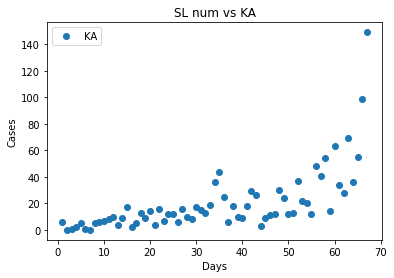

In [9]:
dataset = pd.read_csv('state_wise_daily.csv')
dataset.shape
dataset.plot(x='SL num', y='KA', style='o')  
plt.title('SL num vs KA')  
plt.xlabel('Days')  
plt.ylabel('Cases')  
plt.show()

In [39]:
X = dataset['SL num'].values.reshape(-1,1)
y = dataset['KA'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
#print(X_test)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-8.29256151]
[[0.89352801]]


In [40]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,9,31.916199
1,9,27.448559
2,41,42.638535
3,4,3.323303
4,18,25.661503
5,1,-5.611977
6,30,34.596783
7,16,11.365055
8,5,6.897415
9,0,-6.505505


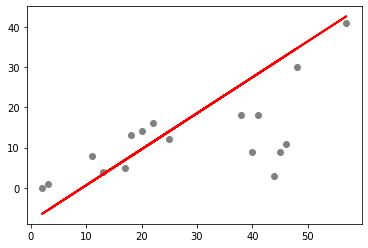

In [41]:

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.053120793568022
Mean Squared Error: 148.24365452149894
Root Mean Squared Error: 12.175535081527174
